# <span style = 'color : Red' >**LINEAR REGRESSION ASSIGNMENT BY SRAVANI MANDALIKA**

## **Problem Statement**<br>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands <br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal**:<br>
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# <span style = 'color : Blue' >STEP - 1: Reading and Understanding Data

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
#Read data from csv file

data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Checking the shape of the dataframe

data.shape

(730, 16)

In [5]:
#Describing the columns of dataframe

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Displaying the info of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Displaying the datatypes of the columns

data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
#Finding the null values

null_values = (round(data.isnull().mean())*100, 2)
null_values

(instant       0.0
 dteday        0.0
 season        0.0
 yr            0.0
 mnth          0.0
 holiday       0.0
 weekday       0.0
 workingday    0.0
 weathersit    0.0
 temp          0.0
 atemp         0.0
 hum           0.0
 windspeed     0.0
 casual        0.0
 registered    0.0
 cnt           0.0
 dtype: float64,
 2)

In [9]:
#Renaming the column names for readibility

data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
data.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
data["year"] = data['year'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    float64
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(5), int64(10), object(1)
memory usage: 91.4+ KB


In [11]:
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0.0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0.0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0.0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0.0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0.0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#Copying the dataframe into new

data_copy = data.copy()

In [13]:
#Checking the shape of the copy

data_copy.shape

(730, 16)

In [14]:
#Dropping the duplicates

data_copy.drop_duplicates(inplace = True)

In [15]:
#Again verifying the shape

data_copy.shape

(730, 16)

# <span style = 'color : Green' >Conclusion:
 - The shape of the dataframe is same even after removing the duplicates, so that means there are **no duplicates** in the original dataframe as well.
 

#### The unwanted columns:
 1. **'instant'** column has only index for the row.
 2. **'dteday'** column has date which can be compensated by year and month column.
 3. **'casual'** and **'registered'** columns are the break of the category for **'cnt'** column.

In [16]:
#Dropping the unwanted columns

data.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [17]:
#Re-verifying the shape and columns

data.shape

(730, 12)

In [18]:
data.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [19]:
# Encoding/mapping the season column

data.season = data.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [20]:
#Encoding/Mapping the month column

data.month = data.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June',
                            7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [21]:
#Encoding/Mapping the weekday column

data.weekday = data.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [22]:
#Encoding/Mapping the weathersit column

data.weathersit = data.weathersit.map({1:'Clear', 2:'Misty', 3:'Light_snowrain', 4:'Heavy_snowrain'})

In [23]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0.0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0.0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0.0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0.0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0.0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
#Again checking the info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    float64
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 68.6+ KB


# <span style = 'color : Blue' >STEP - 2: Visualising the Data

 - Analysing/Visualising the categorical columns to see how **predictor variable** stands against the **target variable**.

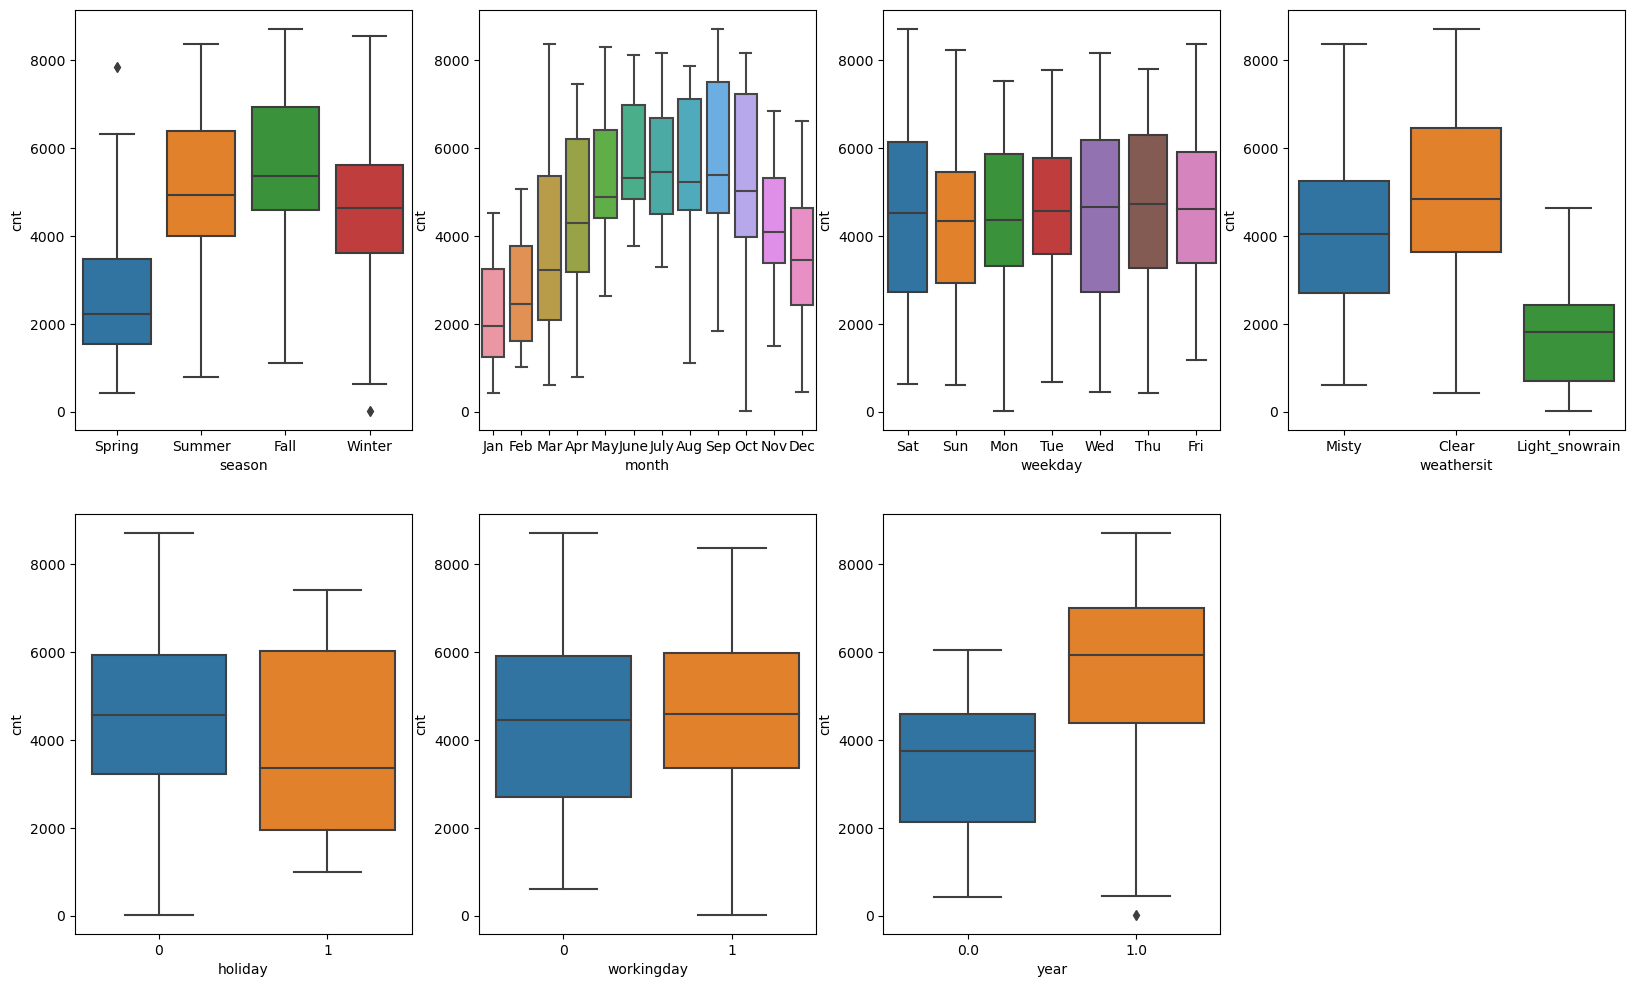

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = data)
plt.show()

In [26]:
#Create a function for barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(x = column, y= 'cnt',data=data)
    plt.subplot(1,2,2)
    sns.barplot(x = column, y = 'cnt',data=data, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

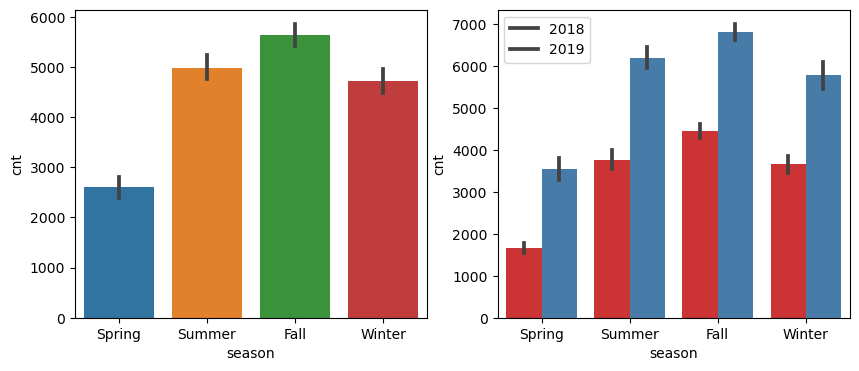

In [27]:
#Plotting visualization for season column

plot_cat_columns('season')

## <span style = 'color : Green' >Observations:
 - **Fall** season seems to have more bookings.
 - In each season, the booking count increased drastically **from 2018 to 2019**.

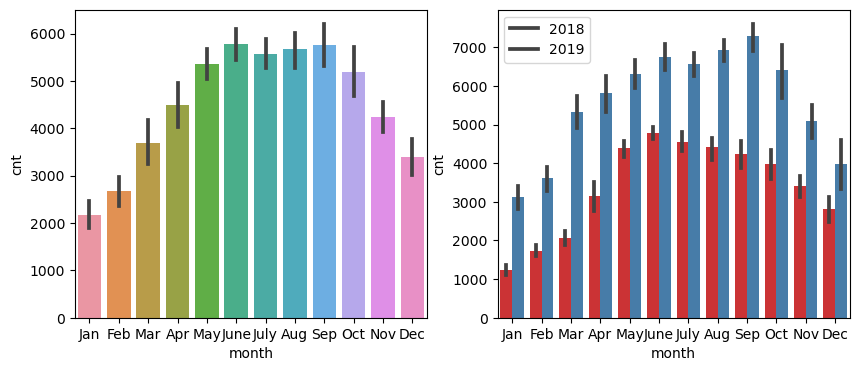

In [28]:
#Plotting visualisation for month column

plot_cat_columns('month')

## <span style = 'color : Green' >Observations:
 - Most of the bookings has been done during the months of **May, June, July, Aug, Sep and Oct**.
 - The count of rental bikes increased in the **starting** of the year till mid of the year and then decreased as approaching the **end** of the year.
 - The number of bookings for each month seems to **increased from 2018 to 2019**.

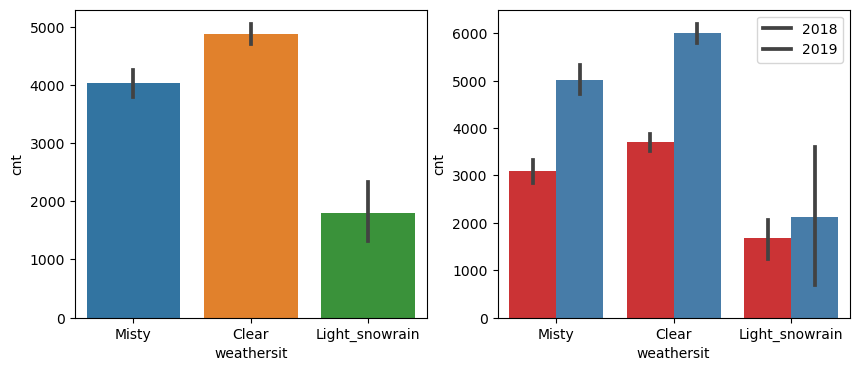

In [29]:
#Plotting visualization for weathersit column

plot_cat_columns('weathersit')

## <span style = 'color : Green'>Observations:
 - Clear weather has more number of bookings.
 - Comparing with 2018, in 2019 there increase in number if bookings in all weather situation.

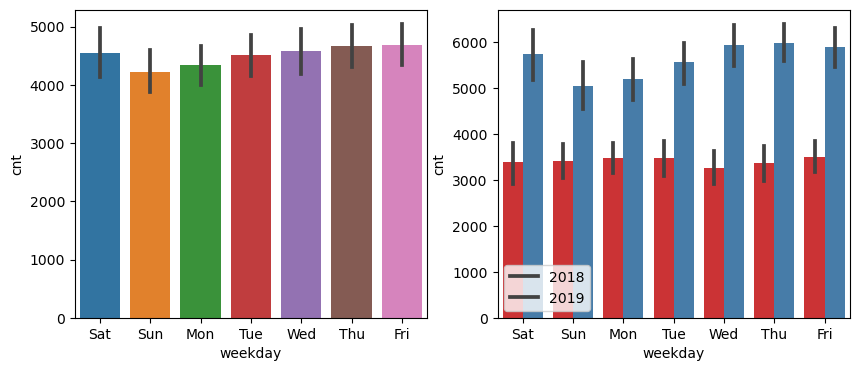

In [30]:
#Plotting visualization for weekday column

plot_cat_columns('weekday')

## <span style = 'color : Green' >Observation:
 - Thursday, Friday, Saturday and Sunday have more bookings compared to the start of the week.

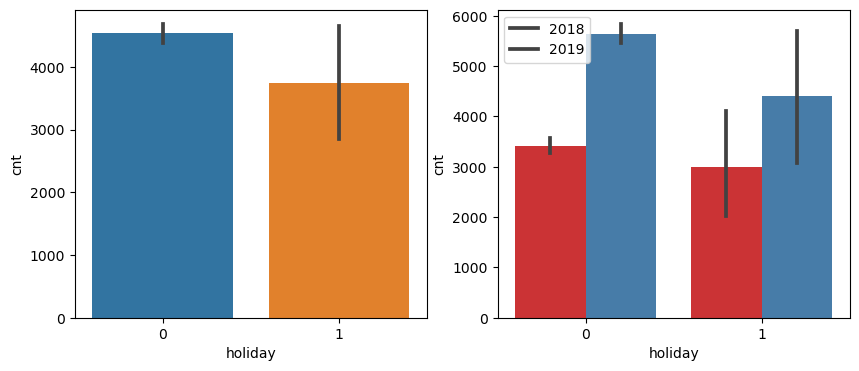

In [31]:
#Plotting visualization for holiday column

plot_cat_columns('holiday')

## <span style = 'color : Green' > Observations:
 - It is very obvious that the number of bookings are more on holidays.
 - In compared to 2018, people in 2019 done more bookings on holidays.

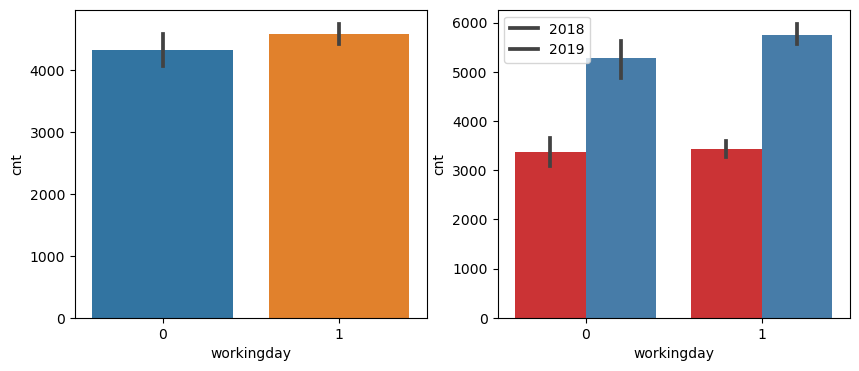

In [32]:
# Plotting visualization for workingday column

plot_cat_columns('workingday')

## <span style = 'color : Green' >Observations:
 - Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

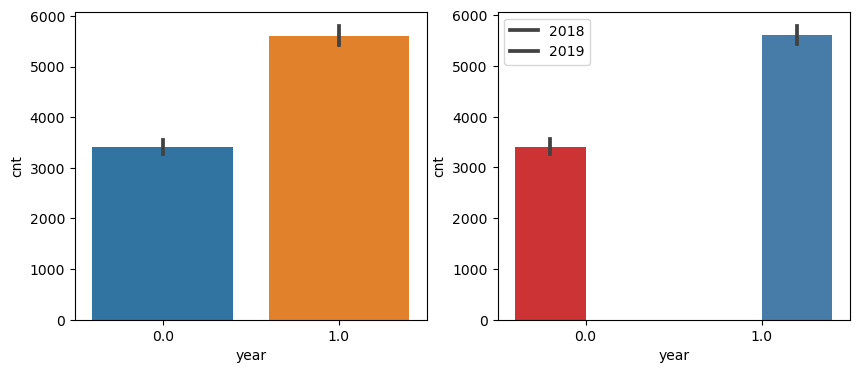

In [33]:
#Plotting visualisation for year column

plot_cat_columns('year')

## <span style = 'color : Green' >Observations:
Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

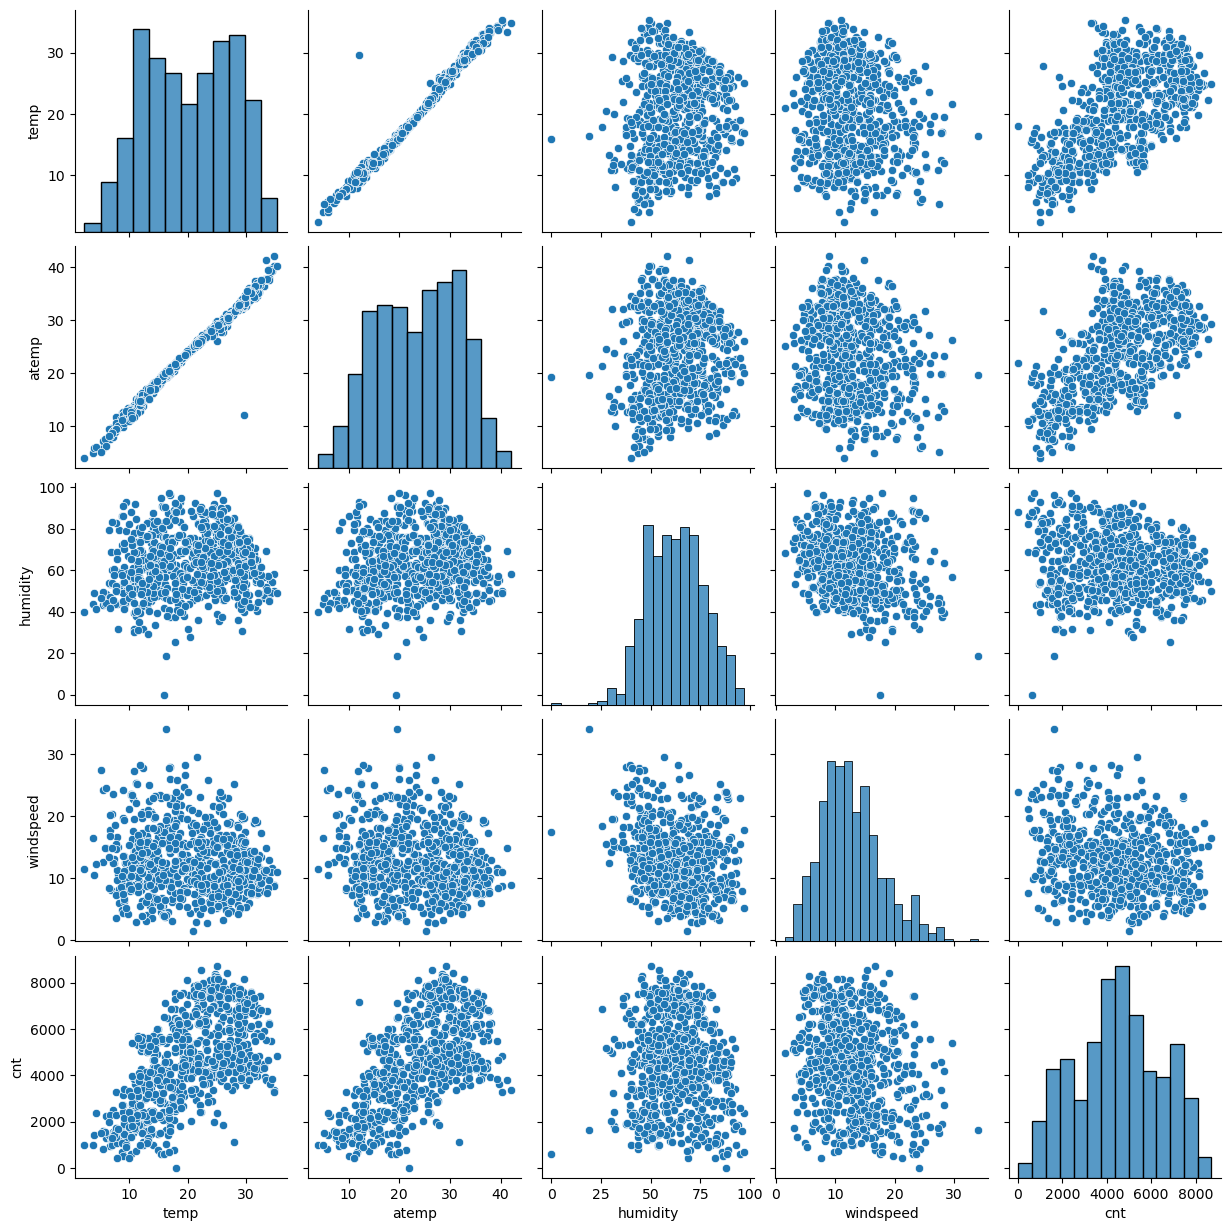

In [34]:
#Visualising the numerical columns

sns.pairplot(data=data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()


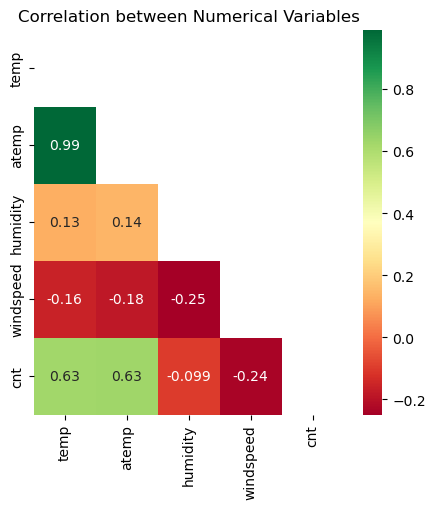

In [35]:
#Checking the correlation between the numerical variables

plt.figure(figsize = (5,5))
matrix = np.triu(data[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

## <span style = 'color : Green' >Conclusion:
 - There is a linear relationship between **temp** and **atemp**.
 - Both the parameters **cannot** be used in the model due to **multicollinearity**.
 - Based on **VIF** and **p-value** with respect to the other variables, which parameters to be kept will be decided.

# <span style = 'color : Blue' >STEP - 3: Data Preparation

In [36]:
#Dummy variable creation for month, weekday, weathersit and season variables.

months_data = pd.get_dummies(data.month, drop_first = True)
weekdays_data = pd.get_dummies(data.weekday, drop_first = True)
weathersit_data = pd.get_dummies(data.weathersit, drop_first = True)
seasons_data = pd.get_dummies(data.season, drop_first = True)

In [37]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0.0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0.0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0.0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0.0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0.0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
#Merging the dataframe with the dummy variables

data_new = pd.concat([data, months_data, weekdays_data, weathersit_data, seasons_data], axis = 1)

In [39]:
data_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,Spring,0.0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,Spring,0.0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,Spring,0.0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,Spring,0.0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,Spring,0.0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [40]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    float64
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    bool   
 13  Dec             730 non-null    bool   
 14  Feb             730 non-null    bool   
 15  Jan             730 non-null    bool   
 16  July            730 non-null    bool   
 17  June            730 non-null    boo

In [41]:
#Removing the unnecessary columns as dummy variables been created

data_new.drop(['season', 'month', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [42]:
data_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,0.0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0.0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0.0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0.0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [43]:
#Checking the shape of new dataframe

data_new.shape

(730, 30)

In [44]:
#Changing the datatype of the variables

int_list = ['holiday', 'workingday', 'cnt']
bool_list = ['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
            'Mon', 'Tue', 'Wed', 'Thu', 'Sat', 'Sun', 'Misty', 'Spring', 'Winter', 'Summer', 'Light_snowrain']

data_new[int_list] = data_new[int_list].astype(float)
data_new[bool_list] = data_new[bool_list].astype(float)

#Checking the info of the new dataframe

data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    float64
 1   holiday         730 non-null    float64
 2   workingday      730 non-null    float64
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    float64
 8   Aug             730 non-null    float64
 9   Dec             730 non-null    float64
 10  Feb             730 non-null    float64
 11  Jan             730 non-null    float64
 12  July            730 non-null    float64
 13  June            730 non-null    float64
 14  Mar             730 non-null    float64
 15  May             730 non-null    float64
 16  Nov             730 non-null    float64
 17  Oct             730 non-null    flo

# <span style = 'color : Blue' >STEP - 4: Splitting the Data into Training and Testing Sets

In [45]:
#Splitting the dataframe into Train and Test sets

np.random.seed(0)
data_train, data_test = train_test_split(data_new, train_size = 0.70, random_state = 100)

In [46]:
#Checking the shape of training set

data_train.shape

(510, 30)

In [47]:
#Checking the shape of testing set

data_test.shape

(220, 30)

In [48]:
#Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [49]:
#Verifying the head of the dataframe before scaling

data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
576,1.0,0.0,1.0,29.246653,33.1448,70.4167,11.083475,7216.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,16.980847,20.6746,62.1250,10.792293,4066.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
728,1.0,0.0,0.0,10.489153,11.5850,48.3333,23.500518,1796.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
482,1.0,0.0,0.0,15.443347,18.8752,48.9583,8.708325,4220.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
111,0.0,0.0,1.0,13.803347,16.0977,72.9583,14.707907,1683.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [50]:
#Apply scaler() to all the columns except 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [51]:
#Verifying the head after scaling

data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
111,0.0,0.0,1.0,0.345824,0.318819,0.751824,0.380981,0.191095,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [52]:
#Describing the dataset

data_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


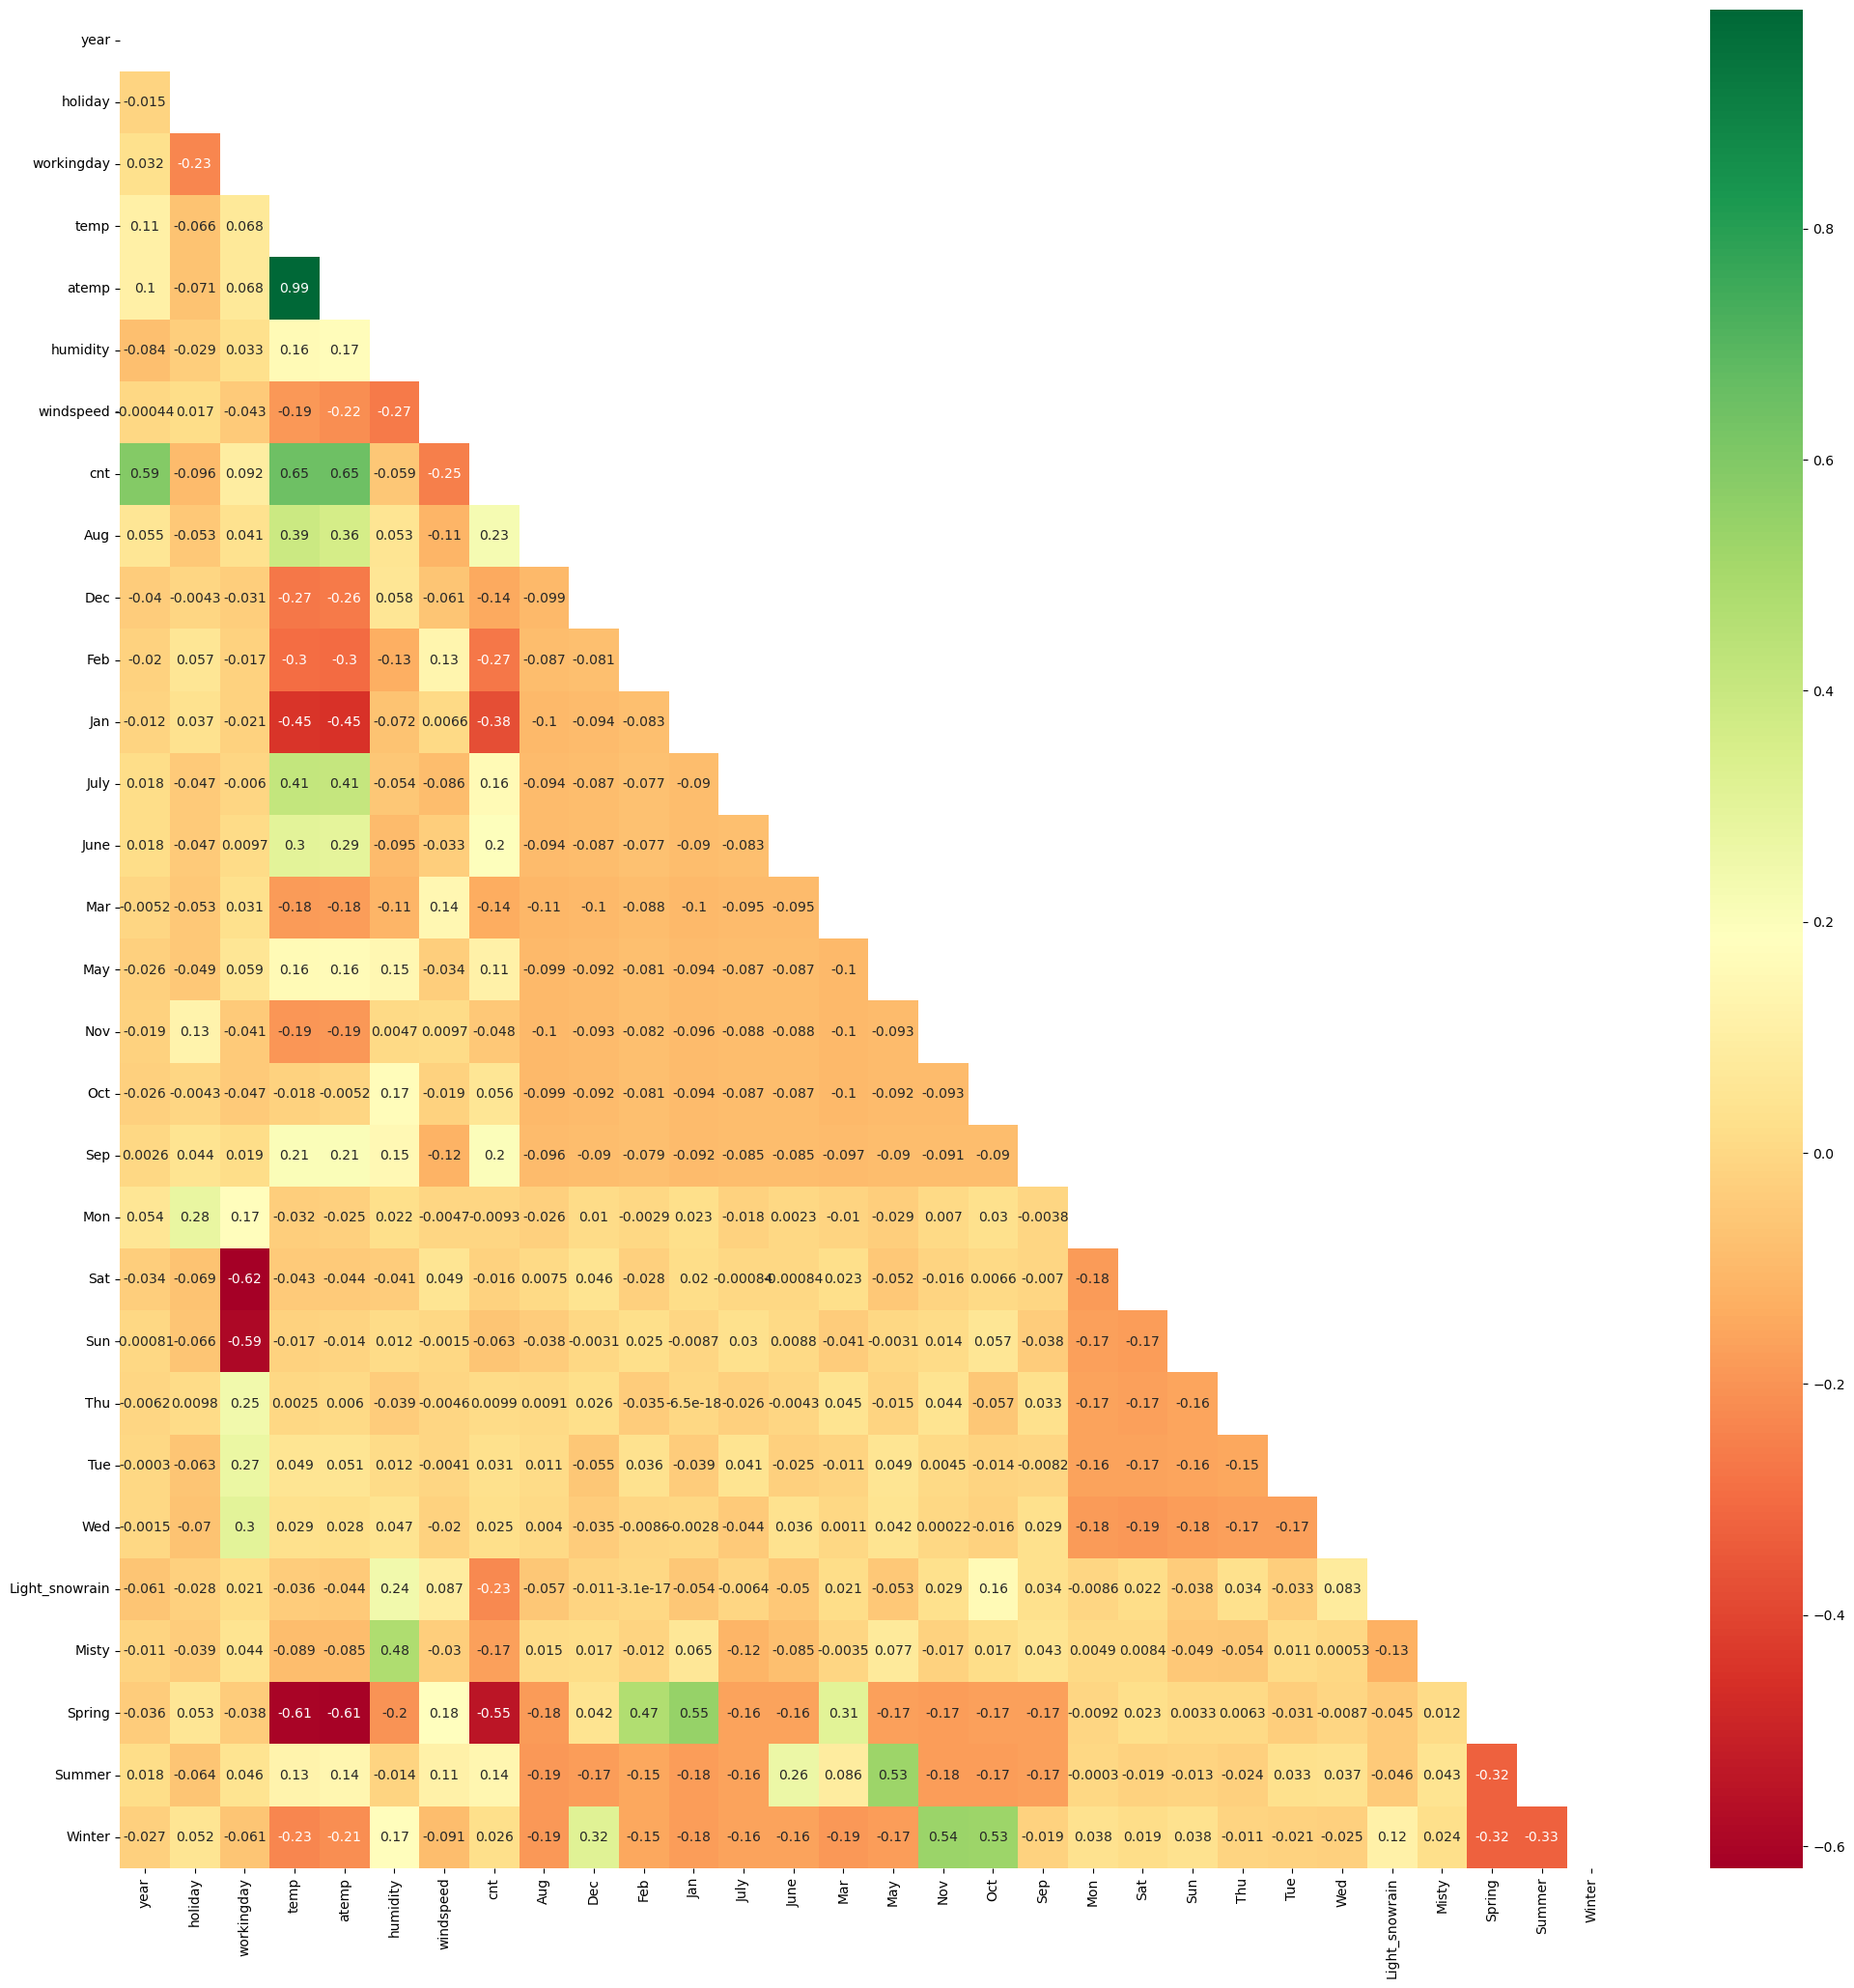

In [53]:
#Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(data_train.corr())
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn", mask = matrix)
plt.show()

## <span style = 'color : Green' >Observation:
 - **cnt** seems to have correlation with **year variable and temp**. 
 - Similarly, **Misty and humidity show correlation**. 
 - **Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation**.

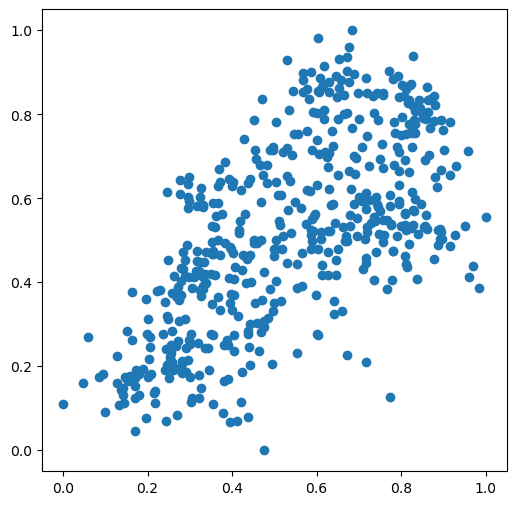

In [54]:
#Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(data_train.temp, data_train.cnt)
plt.show()

**Visualization confirms the positive correlation between temp and cnt.**

In [55]:
#Building the Linear Model

y_train = data_train.pop('cnt')
X_train = data_train

In [56]:
#Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [58]:
#Selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light_snowrain', 'Misty', 'Spring', 'Summer',
       'Winter'],
      dtype='object')


In [59]:
#Checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [60]:
#Dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

# <span style = 'color : Blue' >STEP - 5: Building a Linear Model

In [61]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [64]:
#Generic function to calculate the VIF of variables

def calculateVIF(cols):
    data_1 = X_train_rfe
    vif = pd.DataFrame()
    vif['features'] = data_1.columns
    vif['VIF'] = [variance_inflation_factor(data_1.values, i) for i in range(data_1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

## <span style = 'color : Orange' >MODEL 1

In [65]:
#Selected columns for Model 1 - all columns selected by RFE

build_model(col)

#calculate VIF

calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        16:36:25   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

,features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,Spring,4.53
14,Winter,3.46
13,Summer,2.85
11,Misty,2.29
0,year,2.09
9,Sat,1.98


## <span style = 'color : Orange' >MODEL 2

In [66]:
#As humidity shows high VIF values hence we can drop it

X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

In [68]:
#Building model

build_model(X_train_rfe)

#Calculate VIF

calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          1.60e-188
Time:                        16:38:17   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

,features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,Spring,3.07
12,Summer,2.34
0,year,2.08
13,Winter,1.98
8,Sat,1.97
5,Jan,1.62
6,July,1.59


## <span style = 'color : Orange' >MODEL 3

In [69]:
#Dropping the variable Jan as it has negative coefficient and high p-value

X_train_rfe = X_train_rfe.drop(['Jan'], axis = 1)

In [70]:
#Building model

build_model(X_train_rfe)

#Calculate VIF

calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          1.28e-188
Time:                        16:40:21   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1576      0.031      5.

,features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,Spring,2.49
11,Summer,2.34
0,year,2.07
12,Winter,1.98
7,Sat,1.96
5,July,1.58
9,Misty,1.57


## <span style = 'color : Orange' >MODEL 4

In [71]:
#Dropping the variable Jan as it has negative coefficient and high p-value

X_train_rfe = X_train_rfe.drop(['July'], axis = 1)

In [72]:
#Building model

build_model(X_train_rfe)

#Calculate VIF

calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          3.16e-188
Time:                        16:43:03   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1484      0.031      4.

,features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
9,Spring,2.40
0,year,2.07
10,Summer,2.01
6,Sat,1.96
11,Winter,1.83
8,Misty,1.57
5,Sep,1.24


## <span style = 'color : Orange' >MODEL 5

In [73]:
#Removing the variables workingday and sat

X_train_rfe = X_train_rfe.drop(['workingday', 'Sat'], axis = 1)

In [105]:
#Building model

final = build_model(X_train_rfe)

#Calculate VIF

calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          1.47e-186
Time:                        17:14:37   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

,features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,Spring,1.99
8,Summer,1.90
9,Winter,1.63
6,Misty,1.55
4,Sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


**VIF value now seems to be good as it came below 5.**

## <span style = 'color : Green' >Conclusion:
 - We can cosider the above **Model 5**, as it seems to have very **low multicolinearity** between the predictors and the p-values for all the predictors seems to be significant.
 - **F-Statistics value of 248.4** (which is greater than 1) and the **p-value of 1.47e-186 i.e almost equals to zero**, states that the overall model is **significant**.

In [88]:
#Checking the parameters and coeffiecient values

final.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
Sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
Spring           -0.055406
Summer            0.062076
Winter            0.094476
dtype: float64

In [93]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [95]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train_rfe,y_train)
print(lr.intercept_,lr.coef_)

0.19085463876200248 [ 0.23413182 -0.09631608  0.47773656 -0.14809801  0.09099761 -0.28503144
 -0.0787407  -0.05540612  0.0620761   0.09447641]


# <span style = 'color : Blue' >STEP - 6: Residual Analysis

In [89]:
X_train_rfe

,year,holiday,temp,windspeed,Sep,Light_snowrain,Misty,Spring,Summer,Winter
576,1.0,0.0,0.815169,0.264686,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.442393,0.255342,0.0,0.0,1.0,1.0,0.0,0.0
728,1.0,0.0,0.245101,0.663106,0.0,0.0,0.0,1.0,0.0,0.0
482,1.0,0.0,0.395666,0.188475,0.0,0.0,1.0,0.0,1.0,0.0
111,0.0,0.0,0.345824,0.380981,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.0,0.863973,0.187140,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.202618,0.111379,0.0,0.0,0.0,1.0,0.0,0.0
350,0.0,0.0,0.248216,0.431816,0.0,0.0,1.0,0.0,0.0,1.0
79,0.0,0.0,0.462664,0.529881,0.0,0.0,1.0,0.0,1.0,0.0


In [106]:
y_train_pred = lr.predict(X_train_rfe)

### <span style = 'color : Brown' >Normality of error terms

Text(0.5, 0, 'Errors')

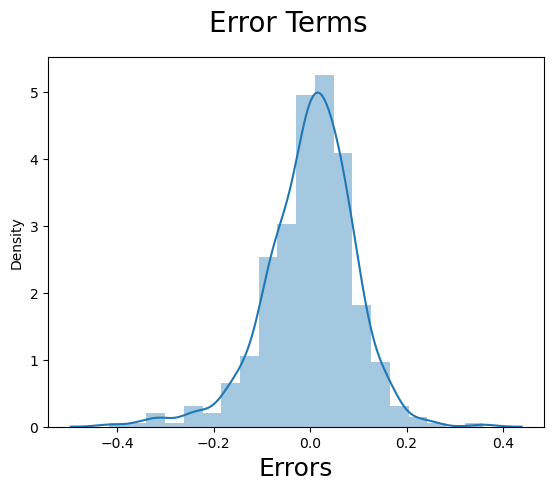

In [97]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

**Error terms are following normal distribution**

### <span style = 'color : Brown' >Multicollinearity

In [98]:
calculateVIF(X_train_rfe)

,features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,Spring,1.99
8,Summer,1.90
9,Winter,1.63
6,Misty,1.55
4,Sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


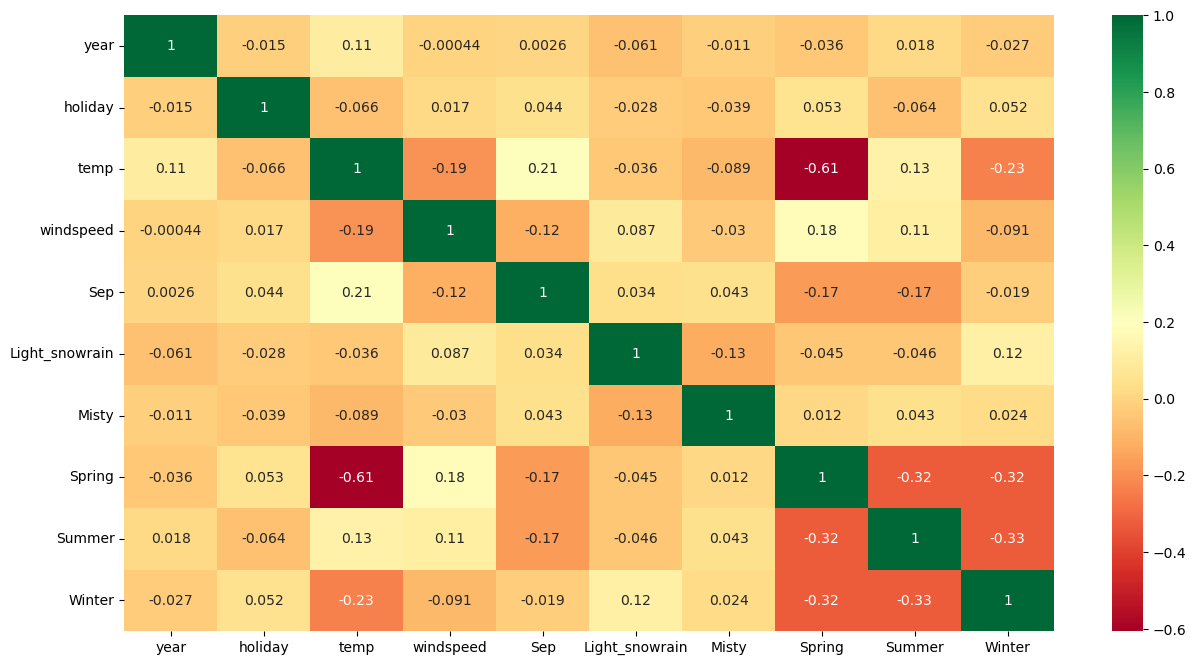

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

**VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.**

### <span style = 'color : Brown' >Homoscedasticity

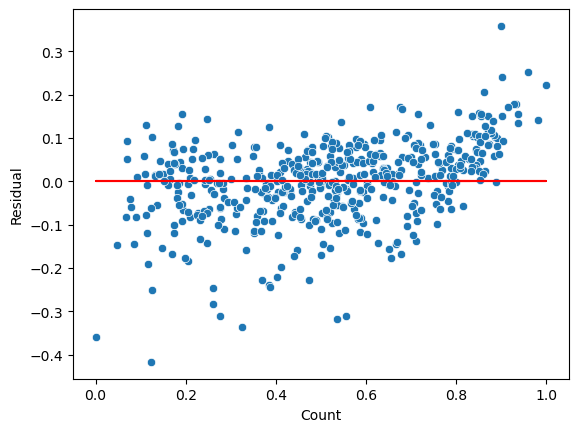

In [108]:
y_train_pred = lr.predict(X_train_rfe)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train,y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**No visible pattern observed from above plot for residuals.**

# <span style = 'color : Blue' >STEP - 7: Making Predictions Using Final Model

Now that we have **fitted the model** and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. **Model 5**.

In [111]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])
data_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
184,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0.692706,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,0.712034,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
299,0.0,0.0,1.0,0.511964,0.496145,0.837699,0.334206,0.303382,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
221,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0.547400,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,1.0,0.817246,0.741471,0.314298,0.537414,0.569029,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
data_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
y_test = data_test.pop('cnt')
X_test = data_test

In [114]:
col1 = X_train_rfe.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
#X_test_lm = sm.add_constant(X_test)

In [116]:
#Predicting the test dataset

y_pred = lr.predict(X_test)

### <span style = 'color : Brown' >R-Squared value for test predictions

In [119]:
# Find out the R squared value between test and predicted test data sets. 

r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

# <span style = 'color : Blue' >STEP - 8: Model Evaluation

#### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

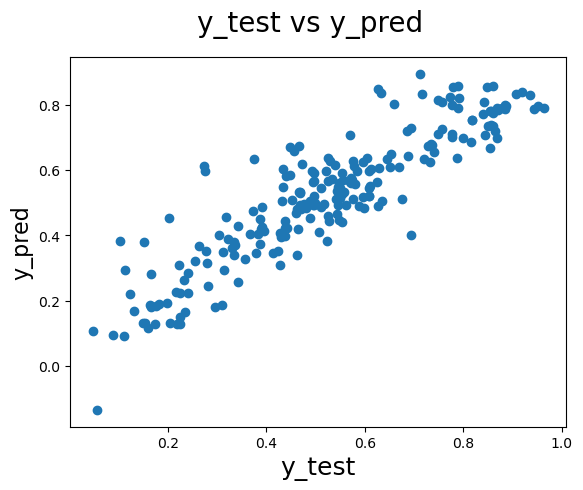

In [120]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [121]:
round(final.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
Sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
Spring           -0.0554
Summer            0.0621
Winter            0.0945
dtype: float64

We can see that the **equation of our best fitted line is**:

### $ cnt = 0.1909 + 0.2341  \times  year - 0.0963  \times  holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

In [122]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


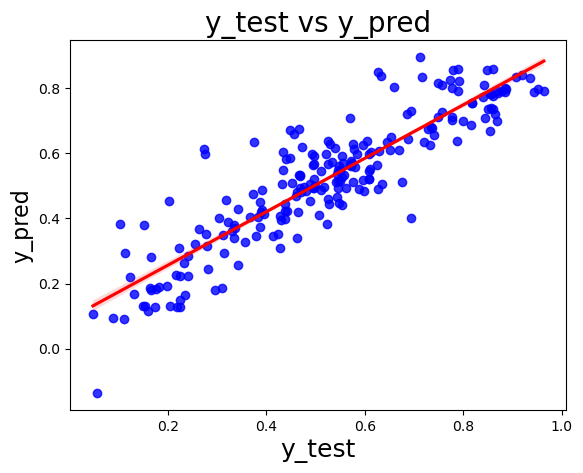

In [123]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# <span style = 'color : Green' >Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.